Please note that only pandas version after 1.0.3 are supported from this notebook.

In [7]:
%load_ext autoreload
%autoreload 2 # Automatically reloads files modified from an external editor

import pandas as pd
import seaborn as sns
print(pd.__version__)

from data_processing import pre_processing, _window_logs, get_session_attributes
from parsing import parse_log_file
from detection_rules import *
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.0.3


Load the log file, parse it and generate the session attributes

In [90]:
parsed_logs = parse_log_file("../access.log", from_date=dt.date(2019, 1, 20))
requests = pre_processing(parsed_logs)

hourly_windowed_logs = _window_logs(requests, window_time_frame="hour")
daily_windowed_logs = _window_logs(requests, window_time_frame="day")

hour_sessions = get_session_attributes(requests, aggregation_level="hour")
day_sessions = get_session_attributes(requests, aggregation_level="day")

In [ ]:
day_sessions.columns
# day_sessions.HEAD_requests_ratio.isnull().sum()

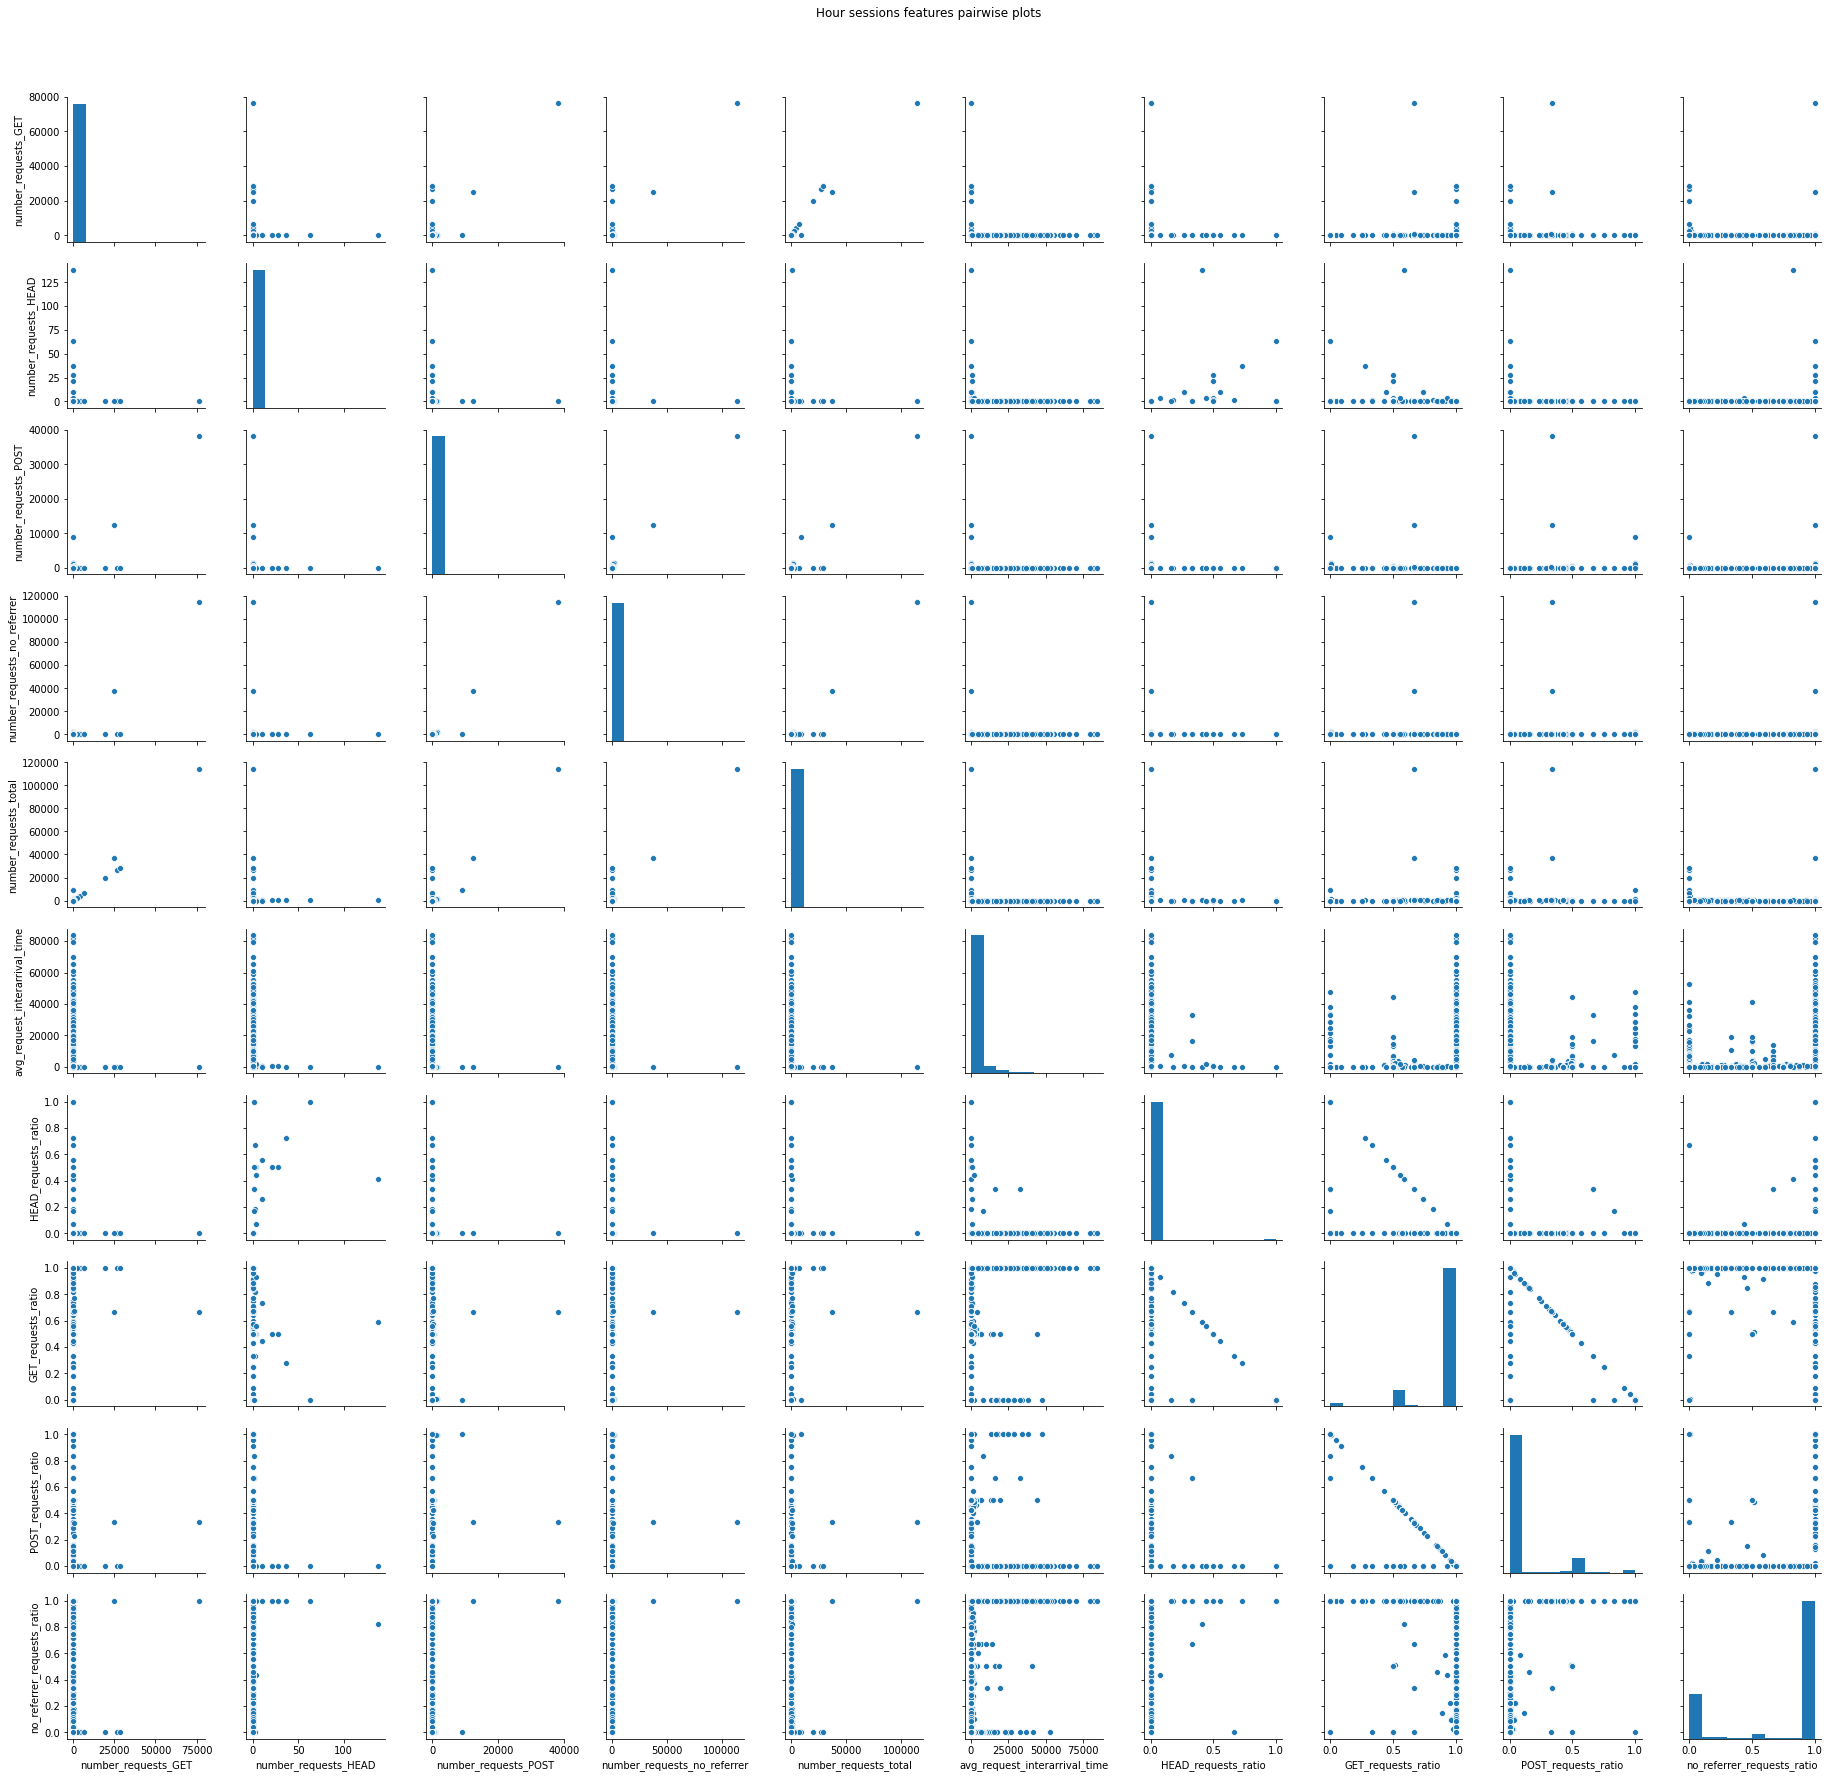

In [3]:
pair_plot = sns.pairplot(data=day_sessions.drop(['host', 'day'], axis=1))
fig = pair_plot.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Hour sessions features pairwise plots')
pair_plot.savefig("pair_plot_day.png")

In [202]:
# Remove rows with only one request that have nan for avg_request_interarrival_time
hour_sessions_filtered = hour_sessions.dropna(subset=['avg_request_interarrival_time'])

model = KMeans(n_clusters=2, init='k-means++').fit(hour_sessions_filtered.drop(['host', 'hour', 'day'], axis=1))

hour_sessions_filtered['label'] = model.labels_

from collections import Counter
Counter(model.labels_)

/Users/cyril/Library/Caches/pypoetry/virtualenvs/datadome-assignment-d-wKOgba-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({0: 46585, 1: 118})

In [213]:
with pd.option_context('display.max_rows', 2000, 'display.max_columns', 50):
#     display(hourly_windowed_logs[hourly_windowed_logs["host"].isin(potential_bots)])
    display(hour_sessions_filtered[hour_sessions_filtered.label == 1])
    

,host,day,hour,number_requests_GET,number_requests_HEAD,number_requests_POST,number_requests_no_referrer,number_requests_total,avg_request_interarrival_time,HEAD_requests_ratio,GET_requests_ratio,POST_requests_ratio,no_referrer_requests_ratio,label
149,100.1.14.108,2019-09-28,13,4846,0,0,4846,4846,0.740144,0.000000,1.000000,0.000000,1.000000,1
151,100.1.14.108,2019-09-28,15,5606,0,0,5606,5606,0.201249,0.000000,1.000000,0.000000,1.000000,1
153,100.1.14.108,2019-09-28,17,8409,1,0,8410,8410,0.425853,0.000119,0.999881,0.000000,1.000000,1
155,100.1.14.108,2019-09-28,23,13443,0,0,13443,13443,0.137628,0.000000,1.000000,0.000000,1.000000,1
156,100.1.14.108,2019-09-29,0,5287,2,0,5289,5289,0.454425,0.000378,0.999622,0.000000,1.000000,1
157,100.1.14.108,2019-09-29,10,4775,0,0,4775,4775,0.259950,0.000000,1.000000,0.000000,1.000000,1
159,100.1.14.108,2019-09-29,12,9863,0,0,9863,9863,0.226830,0.000000,1.000000,0.000000,1.000000,1
161,100.1.14.108,2019-09-29,17,5206,0,0,5206,5206,0.244765,0.000000,1.000000,0.000000,1.000000,1
185,100.1.14.108,2019-10-02,12,4995,0,0,4995,4995,0.385663,0.000000,1.000000,0.000000,1.000000,1
195,100.1.14.108,2019-10-04,16,10023,0,0,10023,10023,0.290661,0.000000,1.000000,0.000000,1.000000,1


In [199]:
potential_bots = np.unique(hour_sessions_filtered[hour_sessions_filtered.label == 1]["host"])

In [155]:
print(model.labels_)
model.cluster_centers_

[0 0 0 ... 0 0 0]


array([[1.28032199e+01, 2.72212085e-01, 1.36118922e+01, 2.02349683e+01,
        2.66893206e+01, 1.67270140e+02, 2.17150802e-03, 7.20328845e-01,
        2.77384512e-01, 7.71814510e-01],
       [7.63966949e+03, 2.54237288e-02, 2.60173729e+03, 8.62526271e+03,
        1.02414322e+04, 3.33937285e-01, 4.21228289e-06, 7.45761004e-01,
        2.54234784e-01, 9.17639253e-01]])

In [200]:
potential_bots

array(['100.1.14.108', '111.68.99.198', '13.84.43.203', '154.120.240.138',
       '161.9.192.11', '168.167.80.121', '175.158.52.47',
       '185.246.210.154', '35.203.86.211', '70.37.110.248'], dtype=object)

In [201]:
len(potential_bots)

10

In [214]:
hour_sessions_filtered.values

array([['1.0.189.243', datetime.date(2019, 6, 13), 17, ..., 0.0, 1.0, 0],
       ['1.1.219.161', datetime.date(2019, 6, 16), 3, ..., 0.5, 0.0, 0],
       ['1.10.185.129', datetime.date(2019, 5, 17), 18, ..., 0.0, 0.0, 0],
       ...,
       ['99.5.95.127', datetime.date(2019, 4, 16), 1, ..., 0.0, 1.0, 0],
       ['99.5.95.127', datetime.date(2019, 4, 16), 2, ..., 0.0,
        0.11764705882352941, 0],
       ['99.5.95.127', datetime.date(2019, 4, 28), 12, ..., 0.0,
        0.03225806451612903, 0]], dtype=object)